# DATA EDA

### 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

### 2. Accessing Data

In [13]:
data = pd.read_csv('data/taskrabbitdata.csv', parse_dates=['created_at'])
data.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009185352,1,38,151,0,Furniture Assembly
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1006892359,2,40,193,0,Furniture Assembly
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1012023956,3,28,0,0,Furniture Assembly
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009733517,4,43,303,0,Furniture Assembly
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1013579273,5,29,39,0,Furniture Assembly


### 3. DATA EDA


#### 3.1 Types/ Null Values/ High Level EDA

In [14]:
data.info()
print('\nNull Values not observed.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
recommendation_id      30000 non-null object
created_at             30000 non-null datetime64[ns]
tasker_id              30000 non-null int64
position               30000 non-null int64
hourly_rate            30000 non-null int64
num_completed_tasks    30000 non-null int64
hired                  30000 non-null int64
category               30000 non-null object
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 1.8+ MB

Null Values not observed.


In [15]:
data.describe()

,tasker_id,position,hourly_rate,num_completed_tasks,hired
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.011072e+09,7.873600,57.482533,221.235700,0.056833
std,2.501822e+06,4.319442,36.222860,279.801812,0.231528
min,1.006647e+09,1.000000,18.000000,0.000000,0.000000
25%,1.008955e+09,4.000000,38.000000,23.000000,0.000000
50%,1.010579e+09,8.000000,45.000000,114.000000,0.000000
75%,1.013444e+09,12.000000,60.000000,300.250000,0.000000
max,1.015020e+09,15.000000,290.000000,1406.000000,1.000000


### 3.2 Features EDA
#### **Hired** 

In [16]:
data.hired.value_counts()

0    28295
1     1705
Name: hired, dtype: int64

In [17]:
data.hired.value_counts()
print('% of hired Taskers in the dataset is: {} '.format(round(data.hired.value_counts().values[1]/data.hired.value_counts().values[:].sum(),3) *100))


% of hired Taskers in the dataset is: 5.7 


Text(0, 0.5, 'Taskers Counts')

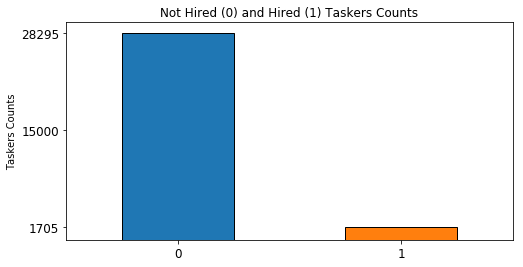

In [18]:
ax = data.hired.value_counts().sort_index().plot.bar(
    figsize = (8,4),
    fontsize = 12, edgecolor='black', rot = 0)
plt.yticks(ticks = [1705, len(data)/2, 28295])
plt.title('Not Hired (0) and Hired (1) Taskers Counts')
plt.ylabel('Taskers Counts')

#### **Time Stamp** 

In [19]:
print('Data is collected for the month of September 2007 starting {} and ending {}'.format(data.created_at.min(), data.created_at.max()))

Data is collected for the month of September 2007 starting 2017-09-01 00:32:25 and ending 2017-09-30 23:15:51


In [22]:
type(data.iloc[0,1])

pandas._libs.tslibs.timestamps.Timestamp

In [87]:
t_data = pd.read_csv('data/taskrabbitdata.csv', parse_dates=['created_at'], index_col = ['created_at'])

In [88]:
t_data.head(2)

,recommendation_id,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
created_at,,,,,,,
2017-09-01 00:32:25,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,1009185352,1,38,151,0,Furniture Assembly
2017-09-01 00:32:25,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,1006892359,2,40,193,0,Furniture Assembly


In [26]:
t_data.index

DatetimeIndex(['2017-09-01 00:32:25', '2017-09-01 00:32:25',
               '2017-09-01 00:32:25', '2017-09-01 00:32:25',
               '2017-09-01 00:32:25', '2017-09-01 00:32:25',
               '2017-09-01 00:32:25', '2017-09-01 00:32:25',
               '2017-09-01 00:32:25', '2017-09-01 00:32:25',
               ...
               '2017-09-30 23:00:19', '2017-09-30 23:00:19',
               '2017-09-30 23:15:51', '2017-09-30 23:15:51',
               '2017-09-30 23:15:51', '2017-09-30 23:15:51',
               '2017-09-30 23:15:51', '2017-09-30 23:15:51',
               '2017-09-30 23:15:51', '2017-09-30 23:15:51'],
              dtype='datetime64[ns]', name='created_at', length=30000, freq=None)

### More practice for time data

In [31]:
temp = pd.read_csv('data/taskrabbitdata.csv')
pd.to_datetime(temp.created_at)
temp = temp.set_index(pd.to_datetime(temp.created_at)).drop('created_at', axis = 1)

In [32]:
temp.head(1)

,recommendation_id,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
created_at,,,,,,,
2017-09-01 00:32:25,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,1009185352,1,38,151,0,Furniture Assembly


In [33]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30000 entries, 2017-09-01 00:32:25 to 2017-09-30 23:15:51
Data columns (total 7 columns):
recommendation_id      30000 non-null object
tasker_id              30000 non-null int64
position               30000 non-null int64
hourly_rate            30000 non-null int64
num_completed_tasks    30000 non-null int64
hired                  30000 non-null int64
category               30000 non-null object
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [34]:
pd.to_datetime('2015-05-20')

Timestamp('2015-05-20 00:00:00')

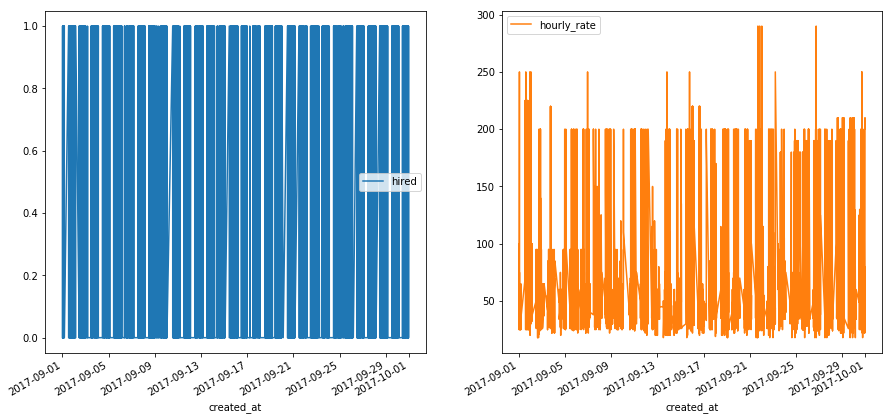

In [42]:
temp[['hired', 'hourly_rate']].plot(figsize = (15,7), subplots = True, layout = (1,2))
plt.show()

In [46]:
temp.loc[:'2017-09-05'].shape

(3990, 7)

In [54]:
pd.date_range(start = '2019-04-28', periods = 41, freq = 'W')

DatetimeIndex(['2019-04-28', '2019-05-05', '2019-05-12', '2019-05-19',
               '2019-05-26', '2019-06-02', '2019-06-09', '2019-06-16',
               '2019-06-23', '2019-06-30', '2019-07-07', '2019-07-14',
               '2019-07-21', '2019-07-28', '2019-08-04', '2019-08-11',
               '2019-08-18', '2019-08-25', '2019-09-01', '2019-09-08',
               '2019-09-15', '2019-09-22', '2019-09-29', '2019-10-06',
               '2019-10-13', '2019-10-20', '2019-10-27', '2019-11-03',
               '2019-11-10', '2019-11-17', '2019-11-24', '2019-12-01',
               '2019-12-08', '2019-12-15', '2019-12-22', '2019-12-29',
               '2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02'],
              dtype='datetime64[ns]', freq='W-SUN')

In [116]:
temp_d = t_data.resample('D', kind = 'timestamp').mean()
temp_d.head(1)

,tasker_id,position,hourly_rate,num_completed_tasks,hired
created_at,,,,,
2017-09-01,1.011197e+09,7.767877,61.435644,201.581958,0.052805


In [122]:
temp_d.loc['2017-09-01':'2017-09-10']

,tasker_id,position,hourly_rate,num_completed_tasks,hired
created_at,,,,,
2017-09-01,1.011197e+09,7.767877,61.435644,201.581958,0.052805
2017-09-02,1.010724e+09,7.846800,51.389297,174.633788,0.057712
2017-09-03,1.011171e+09,7.785851,49.782027,198.055449,0.063098
2017-09-04,1.010858e+09,7.881633,57.222449,246.651020,0.067347
2017-09-05,1.011035e+09,7.712108,56.173094,220.982960,0.061883
2017-09-06,1.010963e+09,7.881720,59.090630,245.872504,0.051459
2017-09-07,1.011090e+09,7.909253,53.425267,230.852313,0.056940
2017-09-08,1.010785e+09,7.868595,55.572727,207.466116,0.051240
2017-09-09,1.011231e+09,7.813953,46.892027,175.041528,0.064784


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a21da9e10>,
      dtype=object)

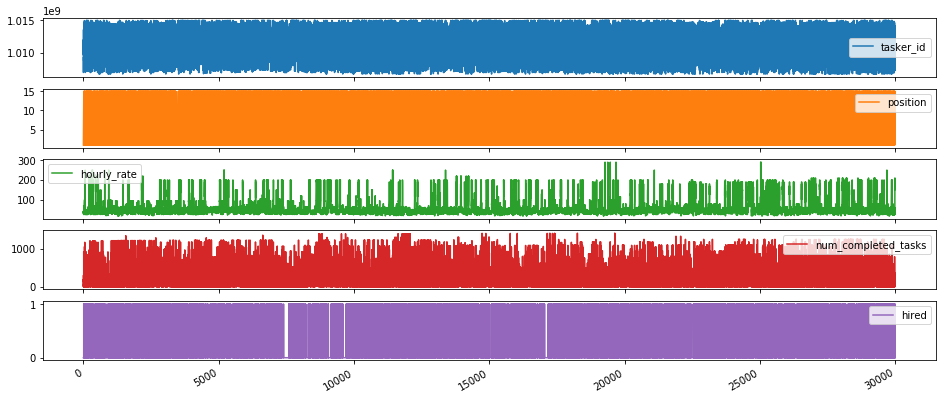

In [124]:
temp.iloc[:, 3:].plot(figsize = (16,7),subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a268c97f0>,
      dtype=object)

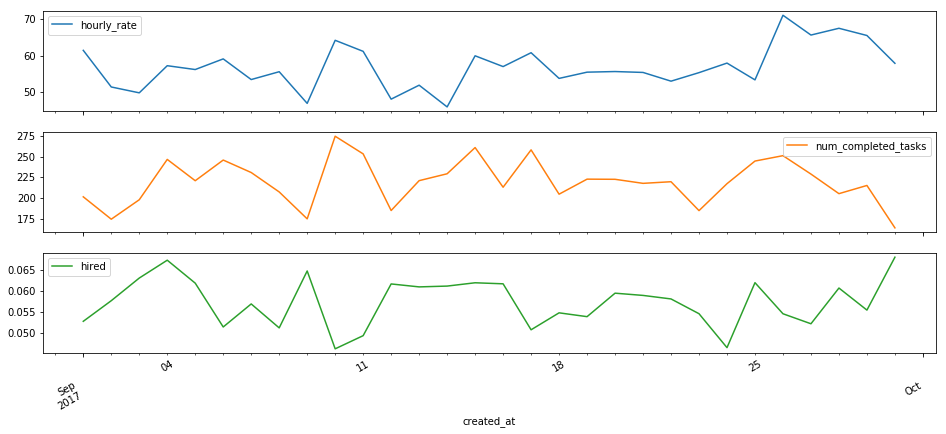

In [117]:
temp_d.iloc[:, 2:].plot(figsize = (16,7),subplots = True)

In [153]:
sundays = pd.date_range(start = '2017-09-03', periods = 5, freq = pd.DateOffset(days = 7))

In [156]:
temp_d.loc[sundays]

,tasker_id,position,hourly_rate,num_completed_tasks,hired
2017-09-03,1.011171e+09,7.785851,49.782027,198.055449,0.063098
2017-09-10,1.010769e+09,8.000000,64.190476,274.574150,0.046259
2017-09-17,1.010814e+09,7.875657,60.784588,258.145359,0.050788
2017-09-24,1.011015e+09,7.967296,57.940881,217.415094,0.046541
2017-10-01,1.011015e+09,7.967296,57.940881,217.415094,0.046541


In [155]:
temp_d = temp_d.reindex(sundays, method = 'ffill')

In [150]:
temp_d.shape

(4, 5)

In [151]:
temp_d.index[0]

Timestamp('2017-09-03 00:00:00', freq='<DateOffset: days=7>')

In [152]:
temp.head()

,index,created_at,recommendation_id,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
0,0,2017-09-01 00:32:25,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,1009185352,1,38,151,0,Furniture Assembly
1,1,2017-09-01 00:32:25,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,1006892359,2,40,193,0,Furniture Assembly
2,2,2017-09-01 00:32:25,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,1012023956,3,28,0,0,Furniture Assembly
3,3,2017-09-01 00:32:25,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,1009733517,4,43,303,0,Furniture Assembly
4,4,2017-09-01 00:32:25,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,1013579273,5,29,39,0,Furniture Assembly


In [9]:
print('Data set consists of data for {} unique taskers'.format(data.tasker_id.nunique()))

Data set consists of data for 830 unique taskers


#### **Tasker Position**
Observing uniform distribution of tasker position


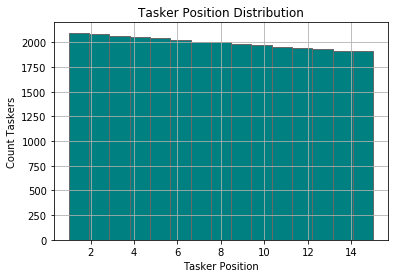

In [10]:
data.position.hist(bins = 15, color = 'teal', edgecolor='dimgrey')
plt.title('Tasker Position Distribution')
plt.xlabel('Tasker Position')
plt.ylabel('Count Taskers')
plt.show()

You can see from this plot below that tasker position in the recommendation list definitely impacts their hirability

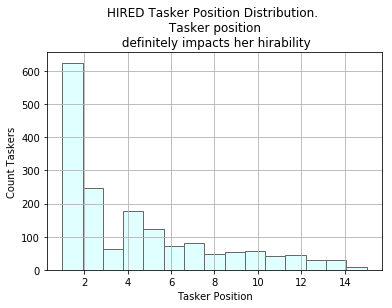

In [37]:
data[hired_mask].position.hist(bins = 15, color = 'lightcyan', edgecolor='dimgrey')
plt.title('HIRED Tasker Position Distribution. \n Tasker position \n definitely impacts her hirability')
plt.xlabel('Tasker Position')
plt.ylabel('Count Taskers')
plt.show()

#### EDA Categories 
Looking at the distributions of categories - We have 3 categories with even 10000 numbers of records

Text(0, 0.5, 'Taskers Count')

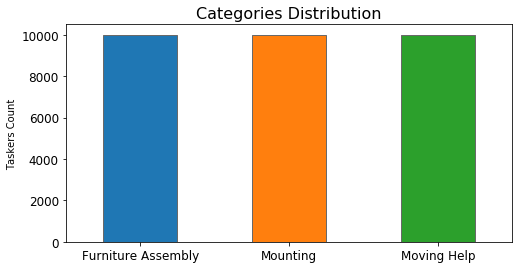

In [12]:
plt.title('Categories Distribution', fontsize = 16)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data.category.value_counts().sort_index().plot.bar(
    figsize = (8,4),
    fontsize = 12, edgecolor='dimgrey', rot = 0)
plt.ylabel('Taskers Count')

#### Now lets look at the number of Hired Taskers per Category
Observing almost identical numbers of hired taskers per each category.

Text(0, 0.5, 'Taskers Count')

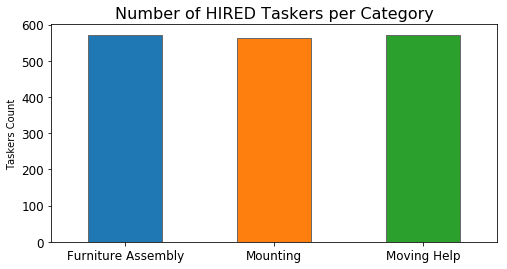

In [13]:
plt.title('Number of HIRED Taskers per Category', fontsize = 16)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data[data.hired ==1].category.value_counts().sort_index().plot.bar(
    figsize = (8,4),
    fontsize = 12, edgecolor='dimgrey', rot = 0)
plt.ylabel('Taskers Count')

#### EDA Num Completed Tasks

In [193]:
num_tasks_hired_med = data[data.hired == 1].num_completed_tasks.median()
num_tasks_hired_75 = np.percentile(data[data.hired == 1].num_completed_tasks, 75)
num_tasks_hired_med, num_tasks_hired_75

(163.0, 357.0)

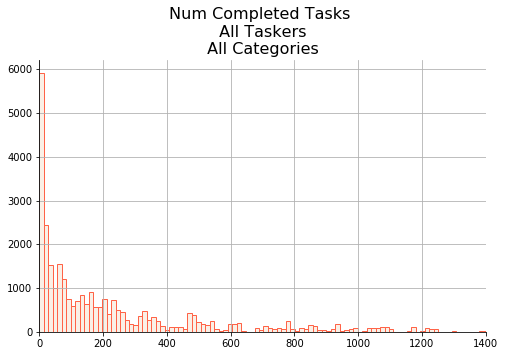

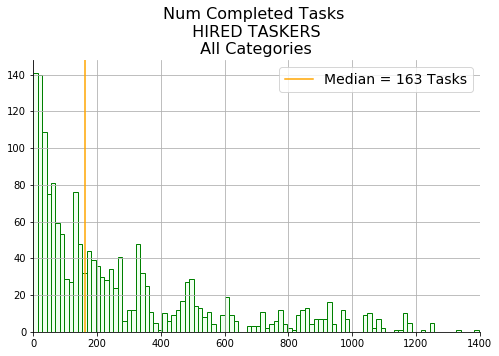

In [190]:
fig, ax = plt.subplots(figsize=[14, 5])
data.num_completed_tasks.hist(bins = 100, figsize = (8, 5), color = 'linen', edgecolor='tomato')
plt.xlim(0,1400)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Num Completed Tasks \n All Taskers \n All Categories ', fontsize = 16)

fig, ax = plt.subplots(figsize=[14, 5])
data[data.hired == 1].num_completed_tasks.hist(bins = 100, figsize = (8, 5), color = 'honeydew', edgecolor='g')
plt.xlim(0,1400)
ax.axvline(x = num_tasks_hired_med , c = 'orange', label = 'Median = 163 Tasks')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Num Completed Tasks \n HIRED TASKERS \n All Categories ', fontsize = 16)
plt.legend(fontsize = 14)

plt.show()


#### EDA **Hourly Rate** 

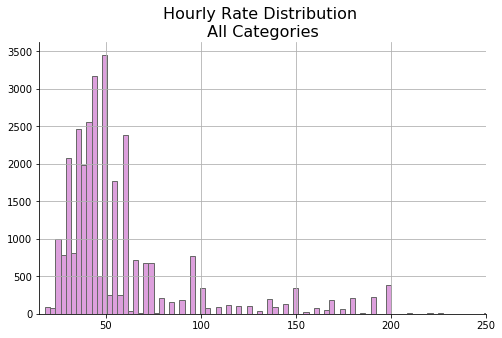

In [14]:
fig, ax = plt.subplots(figsize=[14, 5])
data.hourly_rate.hist(bins = 100, figsize = (8, 5), color = 'plum', edgecolor='dimgrey')
plt.xlim(15,250)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Hourly Rate Distribution \n All Categories ', fontsize = 16)

plt.show()

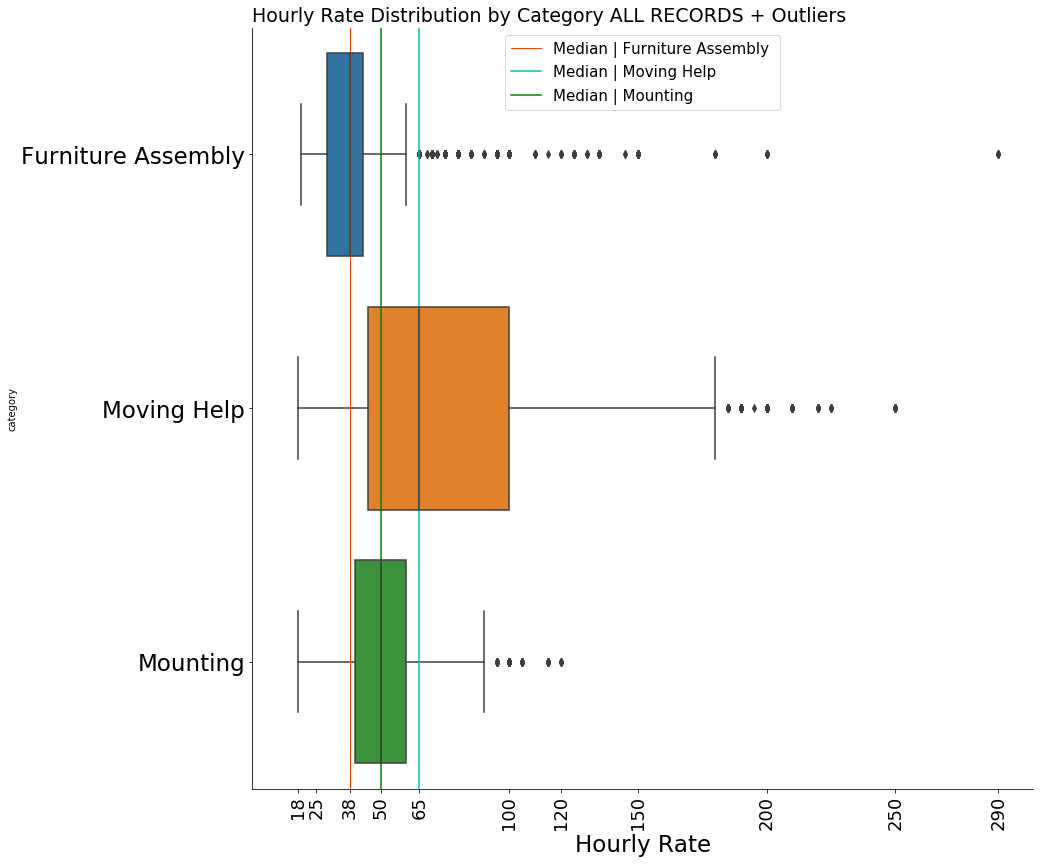

In [16]:
fig, ax = plt.subplots(figsize=[14, 14])
sns.boxplot(
    data=data,
    y=data.category,
    x=data.hourly_rate
)
ax.set_title('Hourly Rate Distribution by Category ALL RECORDS + Outliers', 
             fontsize = 19, loc='left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim(0,)
plt.xticks(( 18, 25, data[data.category == 'Furniture Assembly'].hourly_rate.median(), 
            50, data[data.category == 'Moving Help'].hourly_rate.median(), 100,
            data[data.category == 'Mounting'].hourly_rate.max(),  
            150, 200,data[data.category == 'Moving Help'].hourly_rate.max(), 
            data[data.category == 'Furniture Assembly'].hourly_rate.max()), 
            fontsize = 18, rotation = 90)
plt.yticks(fontsize = 23)
plt.xlabel('Hourly Rate', fontsize = 23)
ax.axvline(x = data[data.category == 'Furniture Assembly'].hourly_rate.median(), 
           c = 'orangered', label = 'Median | Furniture Assembly ', linewidth = 1.0)
ax.axvline(x = data[data.category == 'Moving Help'].hourly_rate.median() , 
           c = 'c', label = 'Median | Moving Help')
ax.axvline(x = data[data.category == 'Mounting'].hourly_rate.median() , 
           c = 'green', label = 'Median | Mounting')
plt.legend(loc='upper center',  fontsize = 15)
plt.show()

#### First thing I want to see is how hourly rate is distributed among taskers that **_were hired_** and compare their distributions

In [166]:
# creating hired boolean mask
hired_mask = data.hired == 1
fa_mask = data.category == 'Furniture Assembly'
mh_mask = data.category == 'Moving Help'
mo_mask = data.category == 'Mounting'

### Observations I have that will be used to suggest hourly rate:


In [167]:
# Furniture Assembly Hourly Rate Distribution Percentiles
min_hr_fa = data[hired_mask][fa_mask].hourly_rate.min()
med_hr_fa = data[hired_mask][fa_mask].hourly_rate.median()
med_plus_2std_fa = data[hired_mask][fa_mask].hourly_rate.median()+2*data[hired_mask][data.category == 'Furniture Assembly'].hourly_rate.std()
fa_75 = np.percentile(data[hired_mask][fa_mask].hourly_rate, 75)  
fa_25 = np.percentile(data[hired_mask][fa_mask].hourly_rate, 25)
fa_max = np.percentile(data[hired_mask][fa_mask].hourly_rate, 100)

# Mounting Hourly Rate Distribution Percentiles
min_hr_mo = data[hired_mask][mo_mask].hourly_rate.min()
med_hr_mo = data[hired_mask][mo_mask].hourly_rate.median()
med_plus_2std_mo = data[hired_mask][mo_mask].hourly_rate.median()+2*data[hired_mask][data.category == 'Mounting'].hourly_rate.std()
mo_75 = np.percentile(data[hired_mask][mo_mask].hourly_rate, 75)  
mo_25 = np.percentile(data[hired_mask][mo_mask].hourly_rate, 25)
mo_max = np.percentile(data[hired_mask][mo_mask].hourly_rate, 100)

# Moving Help Hourly Rate Distribution Percentiles
min_hr_mh = data[hired_mask][mh_mask].hourly_rate.min()
med_hr_mh = data[hired_mask][mh_mask].hourly_rate.median()
med_plus_2std_mh = data[hired_mask][mh_mask].hourly_rate.median()+2*data[hired_mask][data.category == 'Moving Help'].hourly_rate.std()
mh_75 = np.percentile(data[hired_mask][mh_mask].hourly_rate, 75)  
mh_25 = np.percentile(data[hired_mask][mh_mask].hourly_rate, 25)
mh_max = np.percentile(data[hired_mask][mh_mask].hourly_rate, 100)


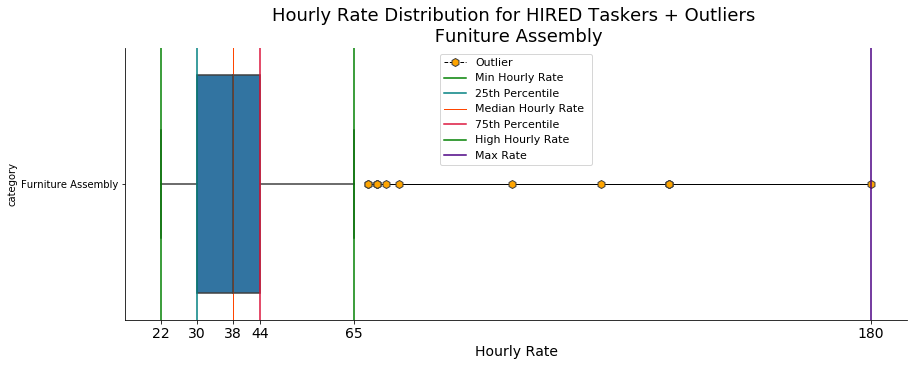

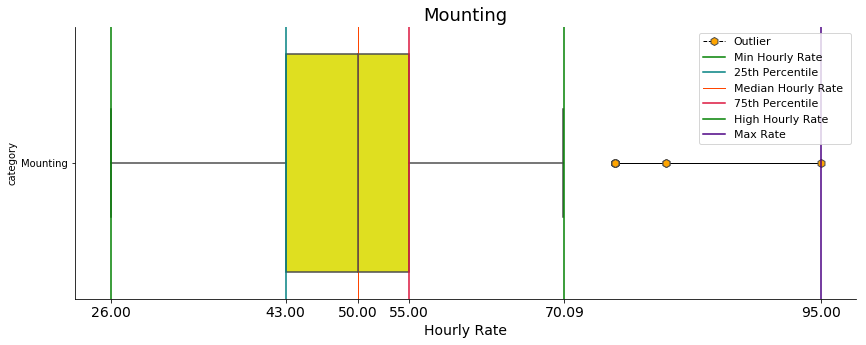

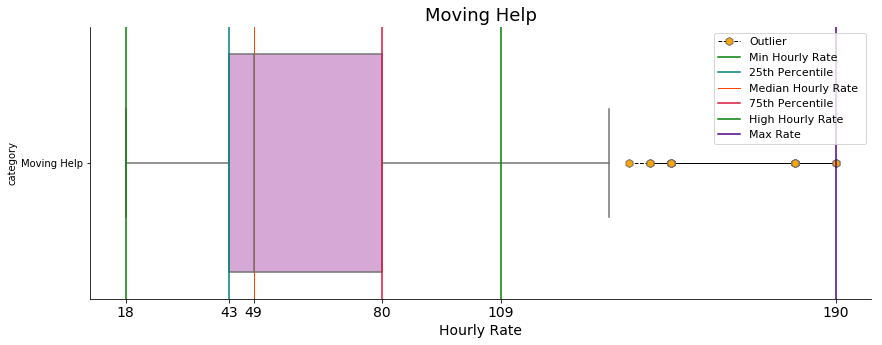

In [162]:
### Furniture Assembly Hourly Rate Distribution for Hired Taskers
fig, ax1 = plt.subplots(figsize=[14, 5])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
flierprops = dict(marker='h', markerfacecolor='orange', markersize=8, 
                  linestyle='--', label = 'Outlier')
sns.boxplot(
    data=data[hired_mask],
    y=data[hired_mask][data.category == 'Furniture Assembly'].category,
    x=data[hired_mask][data.category == 'Furniture Assembly'].hourly_rate,  flierprops=flierprops, meanline = True
)
ax1.set_title('Hourly Rate Distribution for HIRED Taskers + Outliers \n Funiture Assembly', fontsize = 18)

ax1.axvline(x = min_hr_fa , c = 'green', label = 'Min Hourly Rate')
ax1.axvline(x = fa_25  , c = 'teal', label = '25th Percentile')
ax1.axvline(x = med_hr_fa, c = 'orangered', label = 'Median Hourly Rate ', linewidth = 1.0)
ax1.axvline(x = fa_75 , c = 'crimson', label = '75th Percentile')
ax1.axvline(x = med_plus_2std_fa , c = 'green', label = 'High Hourly Rate')
ax1.axvline(x =  fa_max , c = 'indigo', label = 'Max Rate')


plt.legend(loc='upper center',  fontsize = 11)
plt.xticks(( min_hr_fa, fa_25, med_hr_fa, fa_75,med_plus_2std_fa, fa_max), fontsize = 14, rotation = 0)

plt.xlabel('Hourly Rate', fontsize = 14)



### Mounting Hourly Rate Distribution for Hired Taskers
fig, ax1 = plt.subplots(figsize=[14, 5])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
flierprops = dict(marker='h', markerfacecolor='orange', markersize=8, 
                  linestyle='--', label = 'Outlier')
sns.boxplot(
    data=data[hired_mask],
    y=data[hired_mask][data.category == 'Mounting'].category,
    x=data[hired_mask][data.category == 'Mounting'].hourly_rate,  
    flierprops=flierprops, color = 'yellow'
)
ax1.set_title('Mounting', fontsize = 18)

ax1.axvline(x = min_hr_mo , c = 'green', label = 'Min Hourly Rate')
ax1.axvline(x = mo_25  , c = 'teal', label = '25th Percentile')
ax1.axvline(x = med_hr_mo, c = 'orangered', label = 'Median Hourly Rate ', linewidth = 1.0)
ax1.axvline(x = mo_75 , c = 'crimson', label = '75th Percentile')
ax1.axvline(x = med_plus_2std_mo , c = 'green', label = 'High Hourly Rate')
ax1.axvline(x = mo_max, c = 'indigo', label = 'Max Rate')


plt.legend(loc='upper right',  fontsize = 11)
plt.xticks(( min_hr_mo, mo_25, med_hr_mo, mo_75,med_plus_2std_mo, mo_max), 
           fontsize = 14, rotation = 0)

plt.xlabel('Hourly Rate', fontsize = 14)



### Moving Help Hourly Rate Distribution for Hired Taskers
fig, ax1 = plt.subplots(figsize=[14, 5])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
flierprops = dict(marker='h', markerfacecolor='orange', markersize=8, 
                  linestyle='--', label = 'Outlier')
sns.boxplot(
    data=data[hired_mask],
    y=data[hired_mask][data.category == 'Moving Help'].category,
    x=data[hired_mask][data.category == 'Moving Help'].hourly_rate,  
    flierprops=flierprops, color = 'plum'
)
ax1.set_title('Moving Help', fontsize = 18)

ax1.axvline(x = min_hr_mh , c = 'green', label = 'Min Hourly Rate')
ax1.axvline(x = mh_25  , c = 'teal', label = '25th Percentile')
ax1.axvline(x = med_hr_mh, c = 'orangered', label = 'Median Hourly Rate ', linewidth = 1.0)
ax1.axvline(x = mh_75 , c = 'crimson', label = '75th Percentile')
ax1.axvline(x = med_plus_2std_mh , c = 'green', label = 'High Hourly Rate')
ax1.axvline(x = mh_max, c = 'indigo', label = 'Max Rate')


plt.legend(loc='upper right',  fontsize = 11)
plt.xticks(( min_hr_mh, mh_25, med_hr_mh, mh_75,med_plus_2std_mh, mh_max), 
           fontsize = 14, rotation = 0)

plt.xlabel('Hourly Rate', fontsize = 14)

plt.show()

### 4. EDA Variables Relationships
####  4.1  Correlations Matrix. 
Not seeing super strong correlations, **0.29** with _hourly rate vs tasks completed_ is the strongest one



Text(0.5, 1.0, 'Feature Correlations \n All Categories')

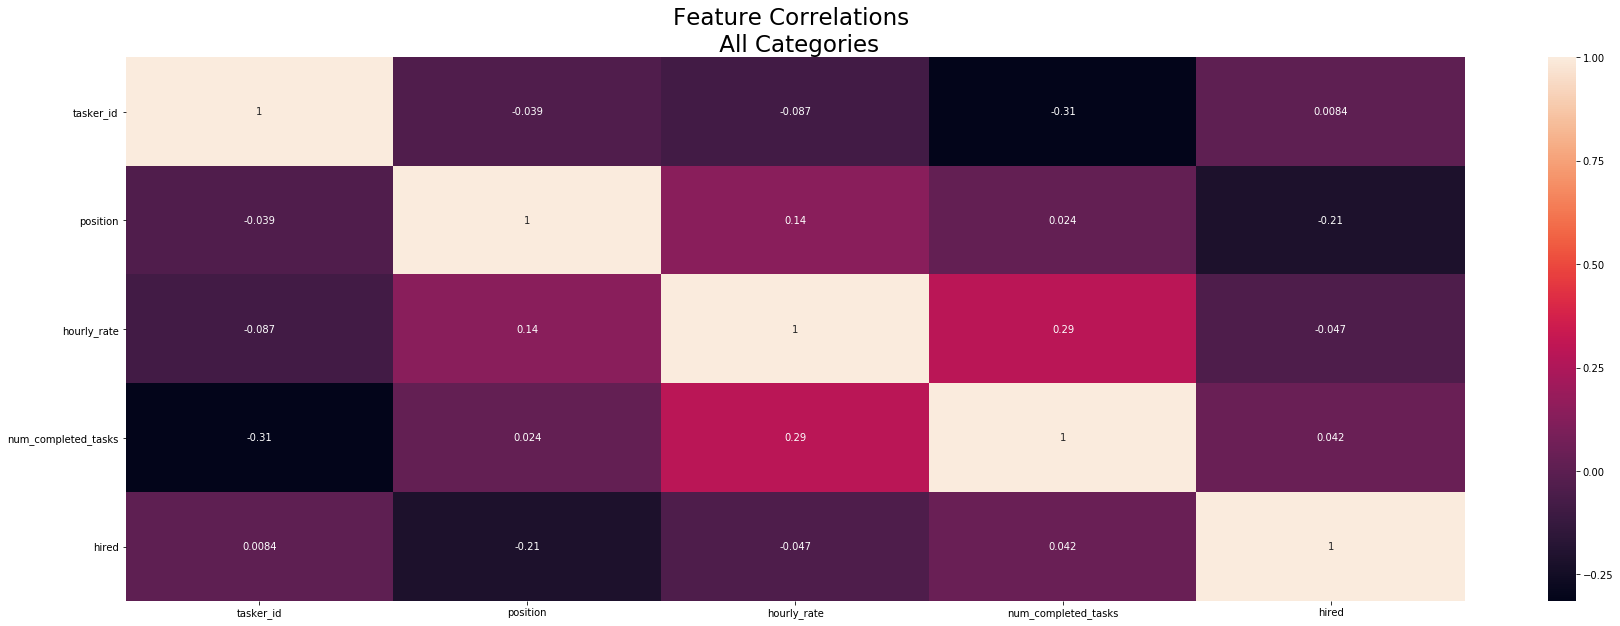

In [19]:
plt.figure(figsize = (30, 10))
sns.heatmap(data.corr(), annot = True)
plt.title('Feature Correlations \n All Categories', fontsize = 23)


#### 4.2 Hourly Rate vs Number of Completed Tasks
Observing some weak linear relationship

Text(0, 0.5, 'hourly_rate')

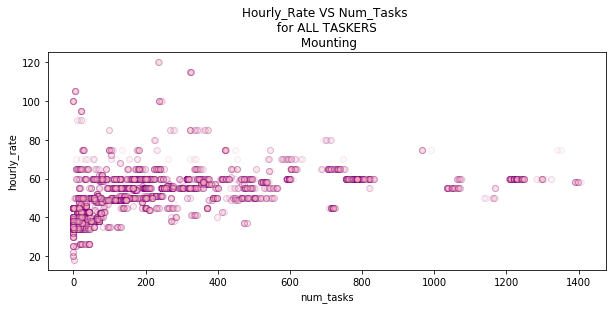

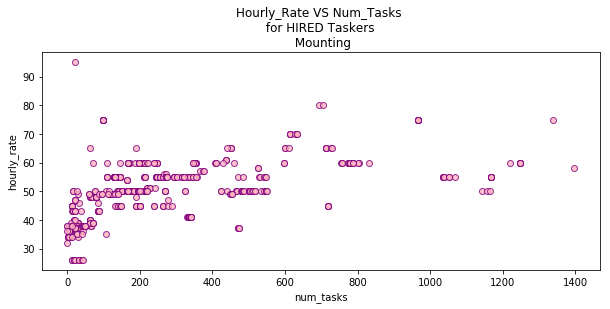

In [28]:
plt.figure(figsize = (10, 4))
plt.title('Hourly_Rate VS Num_Tasks \n for ALL TASKERS \n Mounting')
plt.scatter(x = data[data.category == 'Mounting'].num_completed_tasks,
            y = data[data.category == 'Mounting'].hourly_rate, 
            alpha=0.07, color = 'lightpink', 
            edgecolor = 'purple', linewidth = 1)
plt.xlabel('num_tasks')
plt.ylabel('hourly_rate')

plt.figure(figsize = (10, 4))
plt.title('Hourly_Rate VS Num_Tasks \n for HIRED Taskers \n Mounting')
plt.scatter(data[data.hired ==1][data.category == 'Mounting'].num_completed_tasks,
            data[data.hired == 1][data.category == 'Mounting'].hourly_rate,
            alpha=0.8, color = 'lightpink', 
            edgecolor = 'purple', linewidth = 1)
plt.xlabel('num_tasks')
plt.ylabel('hourly_rate')

Text(0, 0.5, 'hourly_rate')

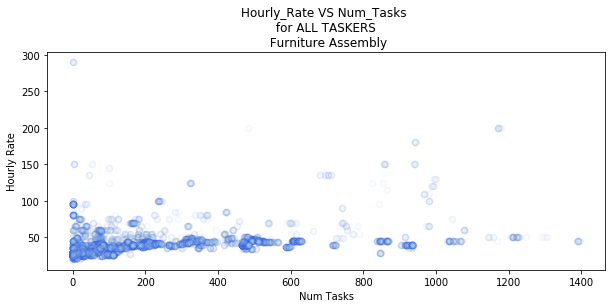

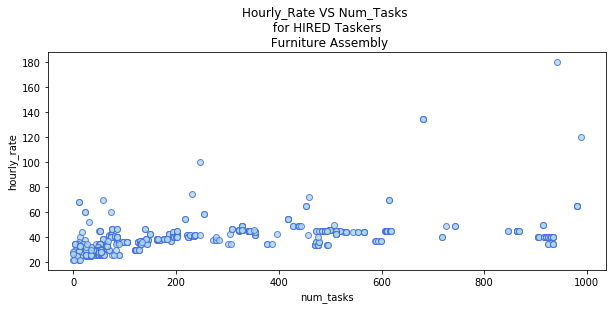

In [29]:
plt.figure(figsize = (10, 4))
plt.title('Hourly_Rate VS Num_Tasks \n for ALL TASKERS \n Furniture Assembly')
plt.scatter(x = data[data.category == 'Furniture Assembly'].num_completed_tasks,
            y = data[data.category == 'Furniture Assembly'].hourly_rate, 
            alpha=0.04, color = 'lightblue', 
            edgecolor = 'royalblue', linewidth = 1.5)
plt.xlabel('Num Tasks')
plt.ylabel('Hourly Rate')

plt.figure(figsize = (10, 4))
plt.title('Hourly_Rate VS Num_Tasks \n for HIRED Taskers \n Furniture Assembly')
plt.scatter(data[data.hired ==1][data.category == 'Furniture Assembly'].num_completed_tasks,
            data[data.hired == 1][data.category == 'Furniture Assembly'].hourly_rate,
            alpha=0.8, color = 'lightblue', 
            edgecolor = 'royalblue', linewidth = 1)
plt.xlabel('num_tasks')
plt.ylabel('hourly_rate')

Text(0, 0.5, 'Number of Taskers')

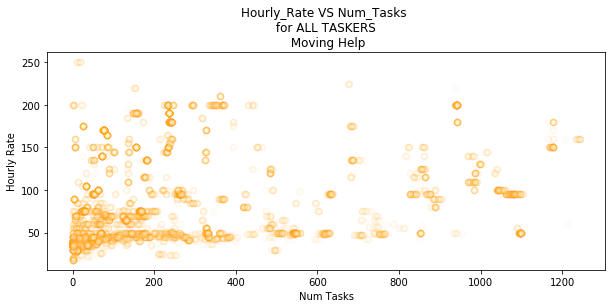

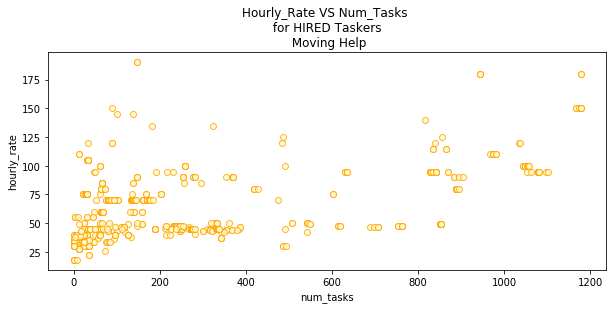

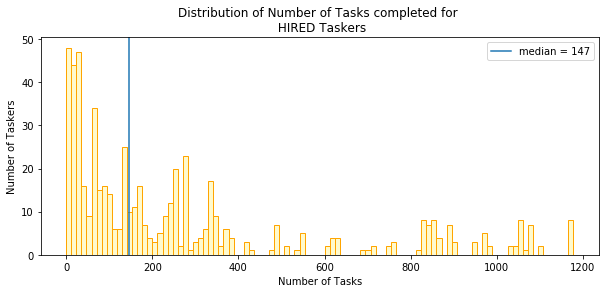

In [81]:
plt.figure(figsize = (10, 4))
plt.title('Hourly_Rate VS Num_Tasks \n for ALL TASKERS \n Moving Help')
plt.scatter(x = data[data.category == 'Moving Help'].num_completed_tasks,
            y = data[data.category == 'Moving Help'].hourly_rate, 
            alpha=0.04, color = 'lemonchiffon', edgecolor = 'orange',
            linewidth = 1.5)
plt.xlabel('Num Tasks')
plt.ylabel('Hourly Rate')

plt.figure(figsize = (10, 4))
plt.title('Hourly_Rate VS Num_Tasks \n for HIRED Taskers \n Moving Help')
plt.scatter(data[data.hired ==1][data.category == 'Moving Help'].num_completed_tasks,
            data[data.hired == 1][data.category == 'Moving Help'].hourly_rate,
            alpha=0.8, color = 'lemonchiffon', edgecolor = 'orange', linewidth = 1)
plt.xlabel('num_tasks')
plt.ylabel('hourly_rate')

plt.figure(figsize = (10, 4))
plt.hist(data[data.hired ==1][data.category == 'Moving Help'].num_completed_tasks, bins = 100,
             color = 'lemonchiffon', edgecolor = 'orange')
plt.axvline(data[data.hired ==1][data.category == 'Moving Help'].num_completed_tasks.median(), label = 'median = 147')
plt.legend()
plt.title('Distribution of Number of Tasks completed for \n HIRED Taskers')
plt.xlabel('Number of Tasks')
plt.ylabel('Number of Taskers')


Text(0, 0.5, 'hourly_rate')

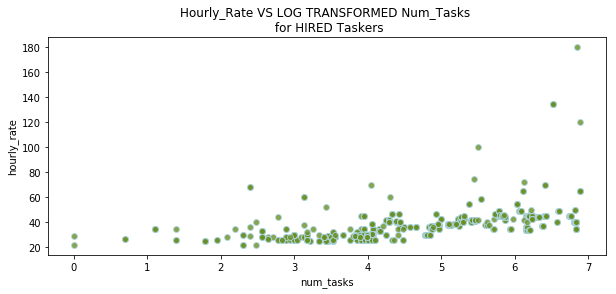

In [34]:
### lets logtransform this and see if we have a little better linear relations here
x_log = np.log(data[hired_mask][data.category == 'Furniture Assembly'].num_completed_tasks)
y = data[hired_mask][data.category == 'Furniture Assembly'].hourly_rate
plt.figure(figsize = (10, 4))
plt.title('Hourly_Rate VS LOG TRANSFORMED Num_Tasks \n for HIRED Taskers')
plt.scatter(x_log, y, alpha=0.8, color = 'olivedrab', edgecolor = 'lightblue', linewidth = 1)
plt.xlabel('num_tasks')
plt.ylabel('hourly_rate')

#### 4.3 Hired vs Hourly Rate

([<matplotlib.axis.XTick at 0x1a2b484d30>,
 <a list of 2 Text xticklabel objects>)

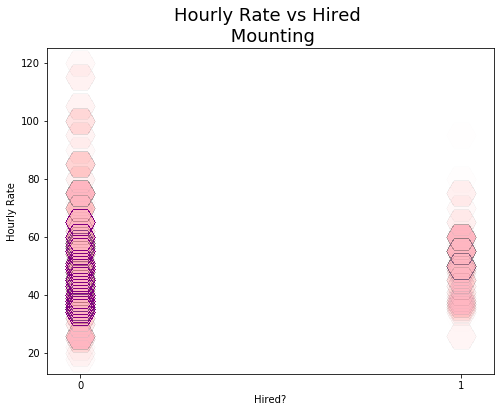

In [229]:
plt.figure(figsize = (8, 6))
plt.scatter(data[data.category == 'Mounting'].hired, 
            data[data.category == 'Mounting'].hourly_rate, 
            alpha = 0.003, s=888,marker='H', 
            color = 'lightpink', edgecolor = 'purple')
plt.xlabel('Hired?')
plt.ylabel('Hourly Rate')
plt.title('Hourly Rate vs Hired \n Mounting', fontsize = 18)
plt.xticks(ticks = [0,1])


([<matplotlib.axis.XTick at 0x1a1f65d240>,
 <a list of 2 Text xticklabel objects>)

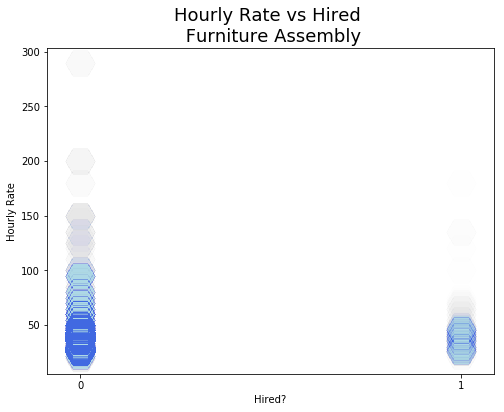

In [36]:
plt.figure(figsize = (8, 6))
plt.scatter(data[data.category == 'Furniture Assembly'].hired, 
            data[data.category == 'Furniture Assembly'].hourly_rate, 
            alpha = 0.005, s=888,marker='H', color = 'lightblue', edgecolor = 'royalblue')
plt.xlabel('Hired?')
plt.ylabel('Hourly Rate')
plt.title('Hourly Rate vs Hired \n Furniture Assembly', fontsize = 18)
plt.xticks(ticks = [0,1])


In [63]:
# computing mean completed tasks for when taskers are hired to use for our suggested price model
mean_hr_hired = data[data.category == 'Moving Help'][data.hired == 1].hourly_rate.mean()
std_hr_hired = data[data.category == 'Moving Help'][data.hired == 1].hourly_rate.std()

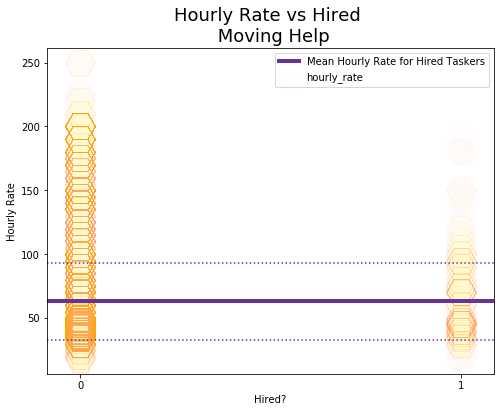

In [66]:
plt.figure(figsize = (8, 6))
plt.scatter(data[data.category == 'Moving Help'].hired, 
            data[data.category == 'Moving Help'].hourly_rate, 
            alpha = 0.006, s=888, marker='H', 
            color = 'lemonchiffon', edgecolor = 'orange')
plt.xlabel('Hired?')
plt.ylabel('Hourly Rate')
plt.title('Hourly Rate vs Hired \n Moving Help', fontsize = 18)
plt.xticks(ticks = [0,1])
plt.axhline(y=mean_hr_hired, color='rebeccapurple', linestyle='-', linewidth = 4, label = 'Mean Hourly Rate for Hired Taskers')
plt.axhline(y=mean_hr_hired+std_hr_hired, color='rebeccapurple', linestyle='dotted', linewidth = 1.5)
plt.axhline(y=mean_hr_hired - std_hr_hired, color='rebeccapurple', linestyle='dotted', linewidth = 1.5)
plt.legend()

#### Tasks Completed VS Hired

In [54]:
# computing mean completed tasks for when taskers are hired to use for our suggested price model
mean_tasks_hired = data[data.hired == 1].num_completed_tasks.mean()
std_tasks_hired = data[data.hired == 1].num_completed_tasks.std()

([<matplotlib.axis.XTick at 0x1a2335dbe0>,
 <a list of 2 Text xticklabel objects>)

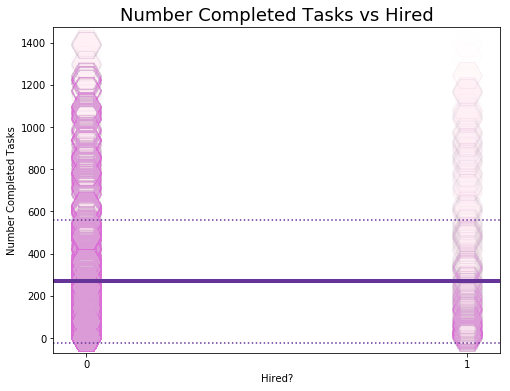

In [57]:
plt.figure(figsize = (8, 6))
plt.scatter(data.hired, 
            data.num_completed_tasks, 
            alpha = 0.01, s=888, marker='H', 
            color = 'lavenderblush', edgecolor = 'orchid')
plt.axhline(y=mean_tasks_hired, color='rebeccapurple', linestyle='-', linewidth = 4)
plt.axhline(y=mean_tasks_hired+std_tasks_hired, color='rebeccapurple', linestyle='dotted', linewidth = 1.5)
plt.axhline(y=mean_tasks_hired - std_tasks_hired, color='rebeccapurple', linestyle='dotted', linewidth = 1.5)
plt.xlabel('Hired?')
plt.ylabel('Number Completed Tasks')
plt.title('Number Completed Tasks vs Hired', fontsize = 18)
plt.xticks(ticks = [0,1])

### Instruction from TaskRabbit
Welcome to the TaskRabbit data science exercise.  We appreciate your
time and effort in completing this exercise.  It helps TaskRabbit
focus on candidates who are the best fit for the Data Scientist role,
and also helps the candidate get an idea of the type of data we work
with and the technical skills required to be successful in the role.

For this exercise, a sample data file is provided which contains
information about "recommendations".  A "recommendation" is the group
of Taskers from which the Client can choose one to book. In this
sample data, each recommendation can have up to 15 Taskers shown.

With this exercise, we want to understand what makes a Client choose a
Tasker. In particular, we want to use market data to build a model
that suggests hourly rates to Taskers that would maximize their
opportunity to be hired.


* **recommendation_id**
unique identifier for this recommendation, or set of taskers shown
* **timestamp**
when this recommendation was shown to the client
* **tasker_id**
unique identifier for the Tasker
* **position**
the position of the Tasker in the recommendation set, 1 - first, 2 - second, etc.
* **hourly_rate**
the hourly rate for the Tasker when they were shown
* **num_completed_tasks**
the number of Tasks the Tasker had completed in that category, when they were shown
* **hired**
was the Tasker hired or not?  Only 1 tasker out of a set of recommendations can be hired
* **category**
the category of work the Client needs help with

* Please describe in detail your approach, with code and visualization
that support your model. What are your dependent and independent
variables? Note that the ranking position is out of the Tasker’s
control, and so also make an argument as to whether you decided to use
this information in your model.
